#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

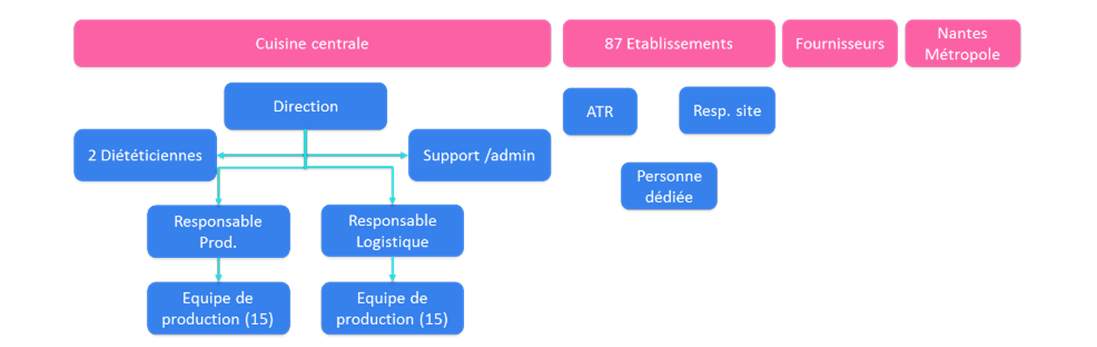

### 4 - Processus actuel

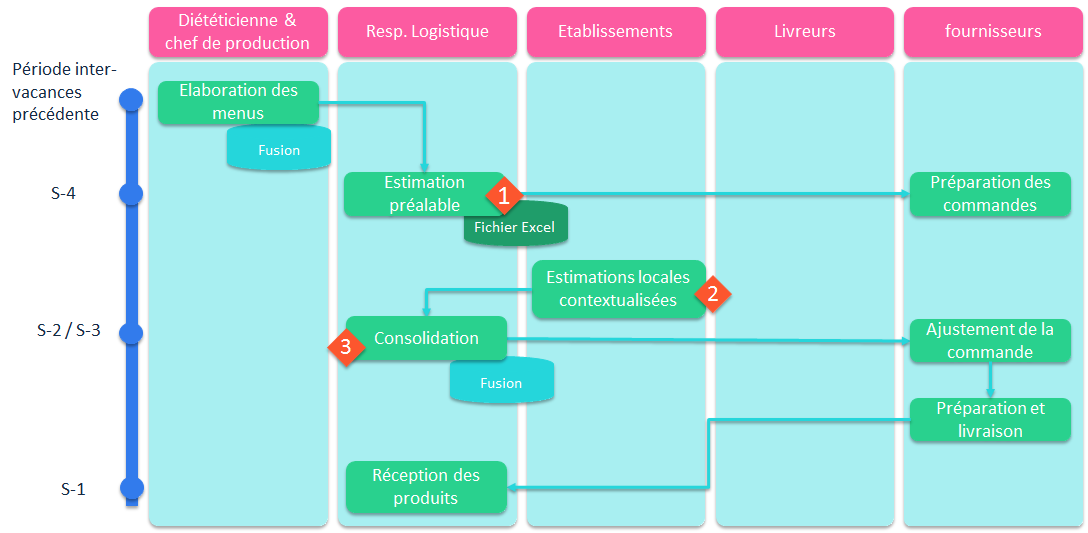

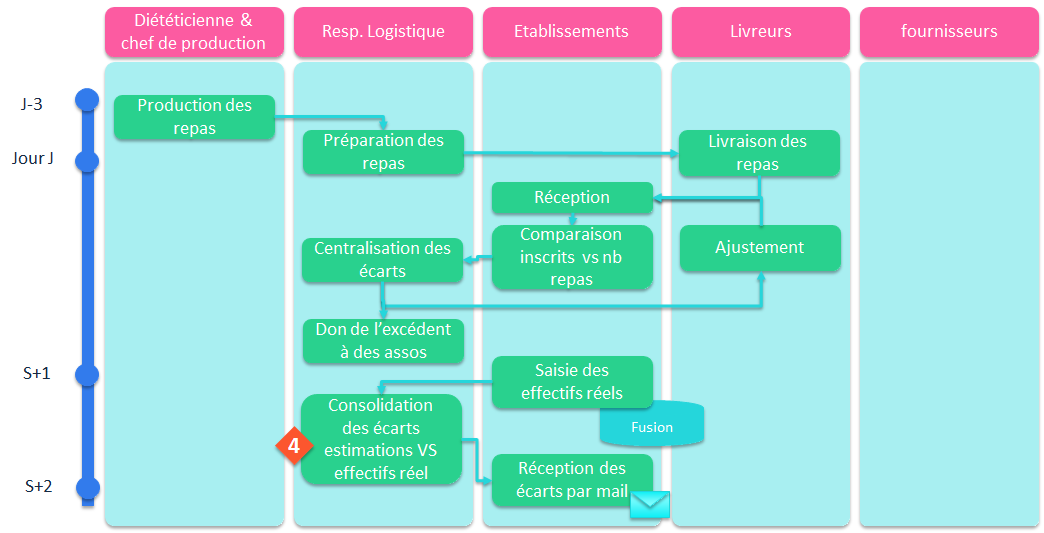

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


In [360]:
import pandas as pd
# import du frichier la frequence
frequentation = pd.read_csv("frequentation.csv")
frequentation=frequentation.drop('Unnamed: 0', axis=1)
# import du frichier le menu
menus=pd.read_csv("menus.csv")
menus=menus.drop('Unnamed: 0', axis=1)
menus = menus.drop(menus[menus['menu'] == '[]'].index)
# merger les deux fichiers sur la date
frequentation= pd.merge(frequentation,menus, on = 'date', how= 'inner')
#rajouter une colonne fréquentation
frequentation ["freq"] = frequentation ["reel"] /frequentation ["effectif"] * 100

In [361]:
frequentation.describe(include='all')

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,freq
count,1101,1101,1101,1101.000000,1101,1101.000000,1101.0,1101.000000,1101.000000,1101.000000,...,1101.000000,1101,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
unique,1101,10,5,NaN,11,NaN,NaN,NaN,NaN,NaN,...,NaN,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03,2013-2014,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,...,NaN,['menu depannage '],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,140,279,NaN,145,NaN,NaN,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,26.545867,NaN,0.091735,0.0,0.013624,0.020890,0.029973,...,18972.175295,NaN,0.148047,0.606721,0.269755,0.417802,0.007266,0.034514,0.003633,67.973217
std,NaN,NaN,NaN,16.062178,NaN,0.288782,0.0,0.115977,0.143081,0.170590,...,1007.286346,NaN,0.355308,0.488700,0.444034,0.493421,0.084970,0.182628,0.060193,12.354588
min,NaN,NaN,NaN,1.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,17373.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,18123.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.498848
50%,NaN,NaN,NaN,24.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,19066.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.337573
75%,NaN,NaN,NaN,41.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,...,19958.000000,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,72.340751


### Identifier les valeurs aberrantes (outliers)

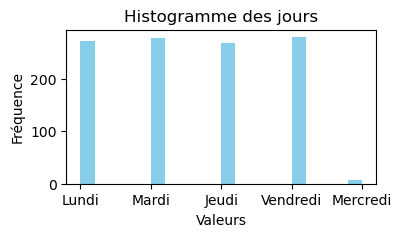

In [362]:
#Tracez un histogramme pour visualiser la distribution des valeurs
import matplotlib.pyplot as plt
import seaborn as sns

effectif = frequentation['jour']

plt.figure(figsize=(4, 2))
plt.hist(effectif, bins=20, color='skyblue')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des jours')
plt.show()


In [363]:
#une fois les valeurs extrêmes repérées, nous allons les supprimer
frequentation = frequentation[frequentation['jour'] != 'Mercredi']

<Axes: title={'center': 'frequentation journalière'}, ylabel='jour'>

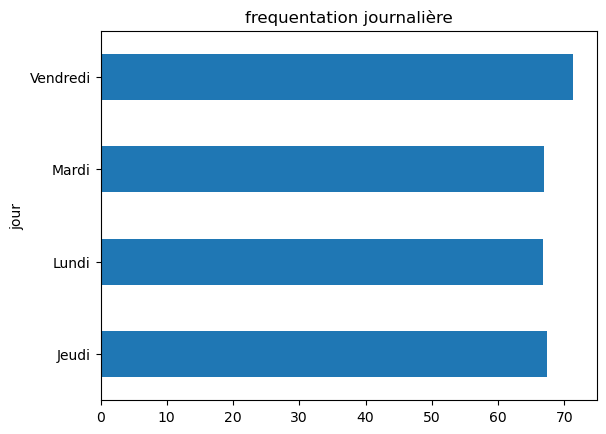

In [364]:
plt.title('frequentation journalière')
frequentation.groupby(["jour"])["freq"].mean().plot(kind="barh")

{'whiskers': [<matplotlib.lines.Line2D at 0x1f27d1f6e60>,
 'caps': [<matplotlib.lines.Line2D at 0x1f27da57400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f27a36df60>],
 'medians': [<matplotlib.lines.Line2D at 0x1f27da56860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f27da545b0>],
 'means': []}

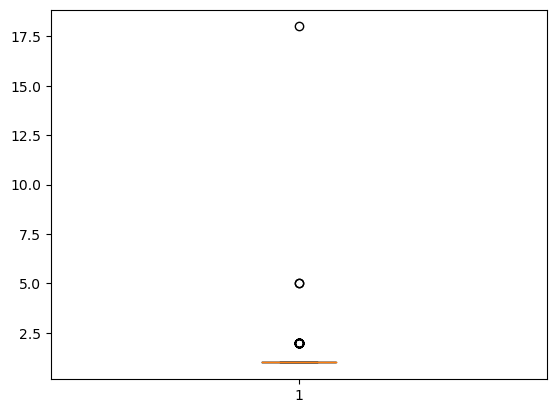

In [365]:
#Tracez un diagramme en boîte pour identifier les valeurs aberrantes :
plt.boxplot(frequentation.groupby(["annee_scolaire","freq"])["freq"].count())

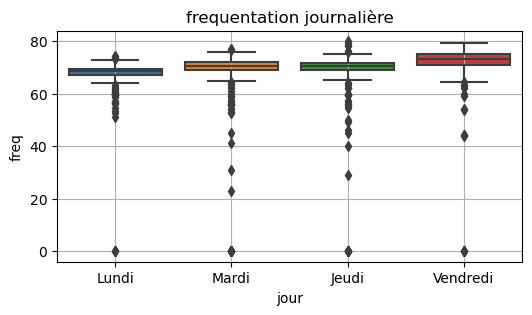

In [366]:
#Verifier le taux de frequentation journalier
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='jour',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation journalière')
plt.grid()
plt.show()

In [367]:
#Supprimer toutes les frequentation inferieures à 55 pourcents
frequentation = frequentation[frequentation['freq'] >=65]

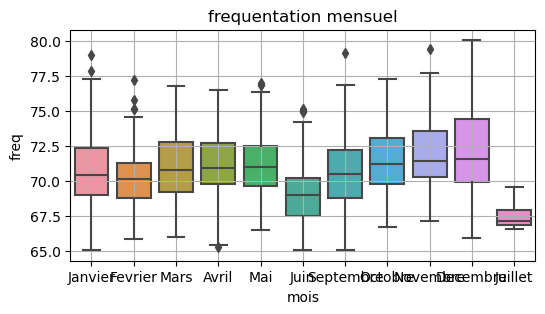

In [368]:
#Verifier le taux de frequentation mensuel
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='mois',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation mensuel')
plt.grid()
plt.show()

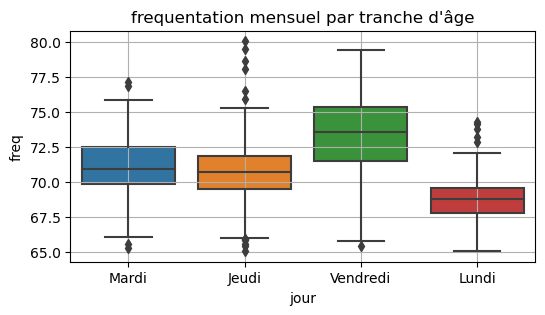

In [369]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='jour',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation mensuel par tranche d\'âge')
plt.grid()
plt.show()

In [370]:
#Vérifier le nombre de valeurs manquantes par colonne :
#frequentation.isnull().sum()

<Axes: title={'center': 'effectif par mois'}, ylabel='effectif'>

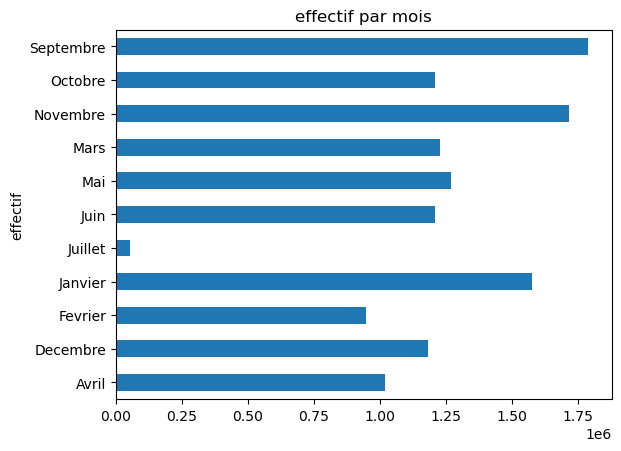

In [371]:
#verifier si tous les 
frequentation.groupby("mois").reel.sum().plot(kind = "barh", title="effectif par mois",ylabel="effectif")

## Calcul des corrélation afin de trouver les facteurs qui influencent la fréquentation des cantines

#### 1-Calcul des corrélation entre Frequentation et jour de greve ( deux valeurs quantitatives)


In [372]:
frequentation.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois', 'freq'],
      dtype='object')

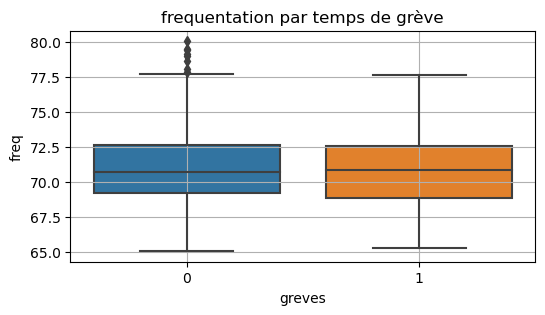

In [373]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='greves',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation par temps de grève')
plt.grid()
plt.show()

On remarque une trés forte corrélation entre les jours de greve et le taux de frequentation. quand il ya grève,il ya tres peu de fréquentation, on va les confirmés par les parametres F e P values + coef corr

In [374]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm= ols('freq ~ jour', data = frequentation).fit()
import statsmodels.api;
freq_1 = sm.stats.anova_lm(lm)

In [375]:
freq_1

,df,sum_sq,mean_sq,F,PR(>F)
jour,3.0,2700.228642,900.076214,191.903422,9.088555e-98
Residual,974.0,4568.309527,4.690256,NaN,NaN


In [376]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           9.09e-98
Time:                        16:03:53   Log-Likelihood:                -2141.5
No. Observations:                 978   AIC:                             4291.
Df Residuals:                     974   BIC:                             4310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           70.7078      0.140    503.683      0.000      70.432      70.983
jour[T.Lundi]       -1.9887      0.199    -10.017      0.000      -2.378      -1.599
jour[T.Mardi]        0.5320      0.198      2.685      0.007       0.143       0.921
jour[T.Vendredi]     2.6295      0.194     13.559      0.000       2.249       3.010
==============================================================================
Omnibus:                       24.067   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.677
Skew:                           0.068   Prob(JB):                     1.63e-11
Kurtosis:                       4.096   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2-Calcul des corrélation entre Frequentation et jour de ferie (une valeur quantitatives et une valeurs qualitatives))


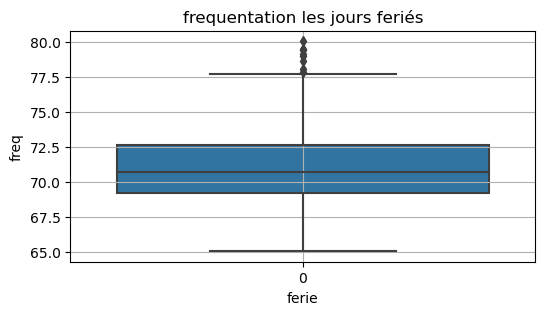

In [377]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='ferie',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation les jours feriés')
plt.grid()
plt.show()

Nous remarquons que nous n'avons pas de correlation entre les deux variables, cela sse confirme par la valeur de R2 cidessous et du F et P

In [378]:

lm_ferie= ols('freq ~ ferie', data = frequentation).fit()
import statsmodels.api;
freq_ferie = sm.stats.anova_lm(lm_ferie)

In [379]:
freq_ferie

,df,sum_sq,mean_sq,F,PR(>F)
ferie,1.0,11.432102,11.432102,1.536645,0.215416
Residual,977.0,7268.538169,7.439650,NaN,NaN


In [380]:
lm_ferie.summary()

C:\Users\Utilisateur\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 18 Jul 2023   Prob (F-statistic):                nan
Time:                        16:03:53   Log-Likelihood:                -2368.6
No. Observations:                 978   AIC:                             4739.
Df Residuals:                     977   BIC:                             4744.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0588      0.087    814.725      0.000      70.888      71.230
ferie               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       28.760   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.735
Skew:                           0.428   Prob(JB):                     2.12e-07
Kurtosis:                       2.849   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [381]:
# import matplotlib.pyplot as plt

# plt.plot(frequentation["freq"],frequentation["ferie"],'o')
# plt.xlabel("freq")
# plt.ylabel("ferie")
# plt.grid()
# plt.title('Répartition du CA par âge')
# plt.show()

#### 3-Calcul des corrélation entre Frequentation et veille_ferie ( une valeur quantitatives et une valeurs qualitatives))

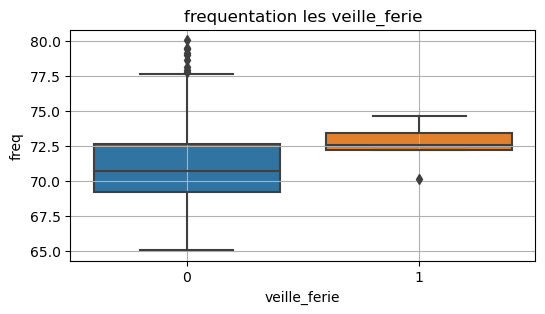

In [382]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='veille_ferie',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation les veille_ferie')
plt.grid()
plt.show()

Nous remarquons que nous n'avons pas de correlation entre les deux variables, cela se confirme par la valeur de R2 ci dessous et du F et P

In [383]:
lm_veille_ferie= ols('freq ~ veille_ferie', data = frequentation).fit()
import statsmodels.api;
freq_veille_ferie = sm.stats.anova_lm(lm_veille_ferie)

In [384]:
freq_veille_ferie

,df,sum_sq,mean_sq,F,PR(>F)
veille_ferie,1.0,21.612953,21.612953,2.910785,0.088307
Residual,976.0,7246.925216,7.425128,NaN,NaN


In [385]:
lm_veille_ferie.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.911
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0883
Time:                        16:03:54   Log-Likelihood:                -2367.1
No. Observations:                 978   AIC:                             4738.
Df Residuals:                     976   BIC:                             4748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.0453      0.087    812.025      0.000      70.874      71.217
veille_ferie     1.6504      0.967      1.706      0.088      -0.248       3.549
==============================================================================
Omnibus:                       29.921   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.155
Skew:                           0.439   Prob(JB):                     1.04e-07
Kurtosis:                       2.871   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4-Calcul des corrélation entre Frequentation et retour_ferie (une valeur quantitatives et une valeurs qualitatives))

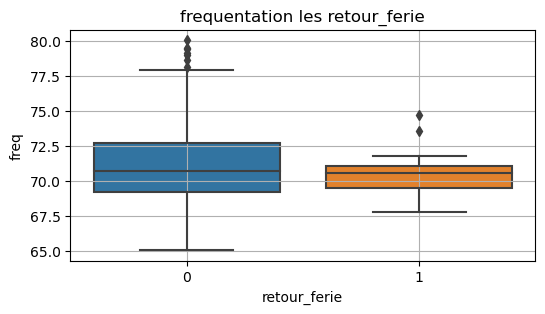

In [386]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='retour_ferie',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation les retour_ferie')
plt.grid()
plt.show()

In [387]:
lm_retour_ferie= ols('freq ~ retour_ferie', data = frequentation).fit()
import statsmodels.api;
freq_retour_ferie = sm.stats.anova_lm(lm_retour_ferie)
freq_retour_ferie

,df,sum_sq,mean_sq,F,PR(>F)
retour_ferie,1.0,7.398237,7.398237,0.994428,0.31891
Residual,976.0,7261.139932,7.439693,NaN,NaN


In [388]:
lm_retour_ferie.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9944
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.319
Time:                        16:03:54   Log-Likelihood:                -2368.1
No. Observations:                 978   AIC:                             4740.
Df Residuals:                     976   BIC:                             4750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.0720      0.088    805.657      0.000      70.899      71.245
retour_ferie    -0.5865      0.588     -0.997      0.319      -1.741       0.568
==============================================================================
Omnibus:                       27.674   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.479
Skew:                           0.418   Prob(JB):                     3.97e-07
Kurtosis:                       2.848   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5-Calcul des corrélation entre Frequentation et vacances ( une valeurs quantitatives et une valeurs qualitatives))

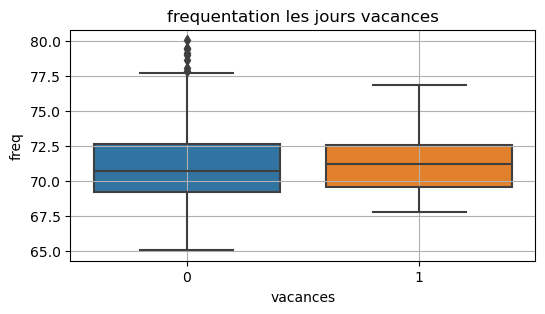

In [389]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='vacances',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation les jours vacances')
plt.grid()
plt.show()

In [390]:
lm_vacances= ols('freq ~ vacances', data = frequentation).fit()
import statsmodels.api;
freq_vacances = sm.stats.anova_lm(lm_vacances)
freq_vacances

,df,sum_sq,mean_sq,F,PR(>F)
vacances,1.0,12.892097,12.892097,1.734192,0.188185
Residual,976.0,7255.646072,7.434064,NaN,NaN


In [391]:
lm_vacances.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.734
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.188
Time:                        16:03:54   Log-Likelihood:                -2367.7
No. Observations:                 978   AIC:                             4739.
Df Residuals:                     976   BIC:                             4749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0387      0.089    802.630      0.000      70.865      71.212
vacances       0.6769      0.514      1.317      0.188      -0.332       1.686
==============================================================================
Omnibus:                       28.833   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.793
Skew:                           0.428   Prob(JB):                     2.06e-07
Kurtosis:                       2.843   Cond. No.                         5.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque une trés forte corrélation entre les jours de vacances et le taux de frequentation. quand il ya grève,il ya tres peu de fréquentation, on va les confirmés par les parametres F e P values + coef corr

#### 6-Calcul des corrélation entre Frequentation et retour_vacances (une valeurs quantitatives et une valeurs qualitatives)

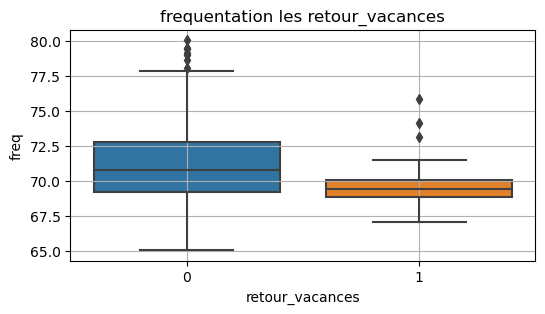

In [392]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='retour_vacances',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation les retour_vacances')
plt.grid()
plt.show()

In [393]:
lm_retour_vacances= ols('freq ~ retour_vacances', data = frequentation).fit()
import statsmodels.api;
freq_retour_vacances = sm.stats.anova_lm(lm_retour_vacances)
freq_retour_vacances

,df,sum_sq,mean_sq,F,PR(>F)
retour_vacances,1.0,49.124877,49.124877,6.641243,0.01011
Residual,976.0,7219.413292,7.396940,NaN,NaN


In [394]:
lm_retour_vacances.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.641
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0101
Time:                        16:03:54   Log-Likelihood:                -2365.2
No. Observations:                 978   AIC:                             4734.
Df Residuals:                     976   BIC:                             4744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          71.0980      0.088    805.312      0.000      70.925      71.271
retour_vacances    -1.3213      0.513     -2.577      0.010      -2.327      -0.315
==============================================================================
Omnibus:                       26.644   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.377
Skew:                           0.412   Prob(JB):                     6.89e-07
Kurtosis:                       2.873   Cond. No.                         5.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 7-Calcul des corrélation entre Frequentation et fete_musulmane (une valeurs quantitatives et une valeurs qualitatives)

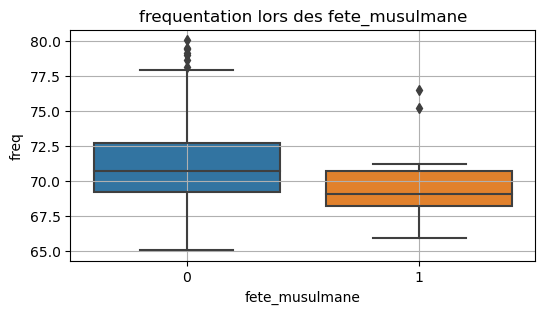

In [395]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='fete_musulmane',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des fete_musulmane')
plt.grid()
plt.show()

In [396]:
ml_fete_musulmane= ols('freq ~ fete_musulmane', data = frequentation).fit()
import statsmodels.api;
freq_fete_musulmane = sm.stats.anova_lm(ml_fete_musulmane)
freq_fete_musulmane

,df,sum_sq,mean_sq,F,PR(>F)
fete_musulmane,1.0,40.937017,40.937017,5.528048,0.018912
Residual,976.0,7227.601152,7.405329,NaN,NaN


In [397]:
ml_fete_musulmane.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.528
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0189
Time:                        16:03:54   Log-Likelihood:                -2365.8
No. Observations:                 978   AIC:                             4736.
Df Residuals:                     976   BIC:                             4745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.0891      0.088    808.140      0.000      70.916      71.262
fete_musulmane    -1.4114      0.600     -2.351      0.019      -2.589      -0.233
==============================================================================
Omnibus:                       28.265   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.251
Skew:                           0.426   Prob(JB):                     2.70e-07
Kurtosis:                       2.878   Cond. No.                         6.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8-Calcul des corrélation entre Frequentation et ramadan (une valeurs quantitatives et une valeurs qualitatives)

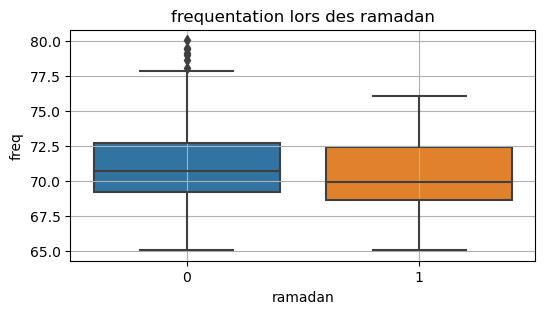

In [398]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='ramadan',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des ramadan')
plt.grid()
plt.show()

In [399]:
ml_ramadan= ols('freq ~ poisson', data = frequentation).fit()
freq_ramadan = sm.stats.anova_lm(ml_ramadan)
freq_ramadan

,df,sum_sq,mean_sq,F,PR(>F)
poisson,1.0,1525.414345,1525.414345,259.232509,6.646859e-52
Residual,976.0,5743.123824,5.884348,NaN,NaN


In [400]:
ml_ramadan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           6.65e-52
Time:                        16:03:55   Log-Likelihood:                -2253.4
No. Observations:                 978   AIC:                             4511.
Df Residuals:                     976   BIC:                             4521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2777      0.091    768.150      0.000      70.098      70.457
poisson        2.7779      0.173     16.101      0.000       2.439       3.116
==============================================================================
Omnibus:                       20.873   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.254
Skew:                           0.197   Prob(JB):                     1.63e-07
Kurtosis:                       3.782   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 9-Calcul des corrélation entre Frequentation et fete_chretienne (une valeurs quantitatives et une valeurs qualitatives)

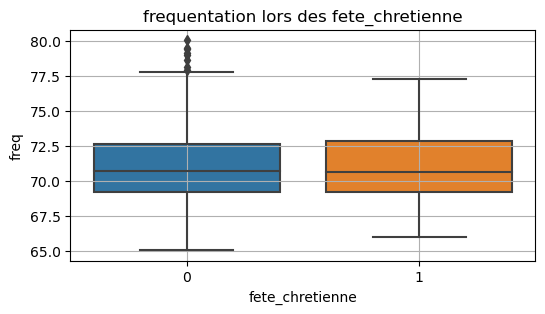

In [401]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='fete_chretienne',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des fete_chretienne')
plt.grid()
plt.show()

In [402]:
ml_fete_chretienne= ols('freq ~ fete_chretienne', data = frequentation).fit()
freq_fete_chretienne = sm.stats.anova_lm(ml_fete_chretienne)
freq_fete_chretienne

,df,sum_sq,mean_sq,F,PR(>F)
fete_chretienne,1.0,0.059402,0.059402,0.007976,0.928853
Residual,976.0,7268.478767,7.447212,NaN,NaN


In [403]:
ml_fete_chretienne.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.007976
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.929
Time:                        16:03:55   Log-Likelihood:                -2368.6
No. Observations:                 978   AIC:                             4741.
Df Residuals:                     976   BIC:                             4751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          71.0565      0.091    781.139      0.000      70.878      71.235
fete_chretienne     0.0288      0.322      0.089      0.929      -0.603       0.661
==============================================================================
Omnibus:                       28.745   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.717
Skew:                           0.428   Prob(JB):                     2.14e-07
Kurtosis:                       2.849   Cond. No.                         3.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 10-Calcul des corrélation entre Frequentation et fete_juive (une valeurs quantitatives et une valeurs qualitatives) fete_juive

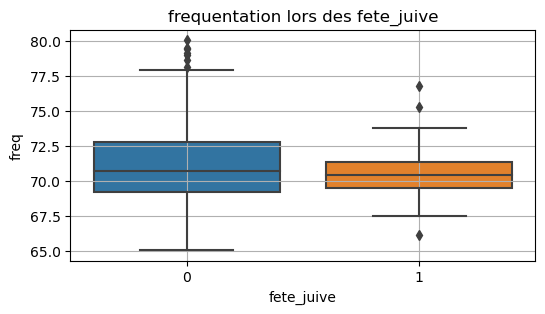

In [404]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='fete_juive',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des fete_juive')
plt.grid()
plt.show()

In [405]:
ml_fete_juive= ols('freq ~ fete_juive', data = frequentation).fit()
freq_fete_juive = sm.stats.anova_lm(ml_fete_juive)
freq_fete_juive

,df,sum_sq,mean_sq,F,PR(>F)
fete_juive,1.0,7.934525,7.934525,1.066591,0.301972
Residual,976.0,7260.603644,7.439143,NaN,NaN


In [406]:
ml_fete_juive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.067
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.302
Time:                        16:03:55   Log-Likelihood:                -2368.0
No. Observations:                 978   AIC:                             4740.
Df Residuals:                     976   BIC:                             4750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0751      0.089    801.920      0.000      70.901      71.249
fete_juive    -0.5141      0.498     -1.033      0.302      -1.491       0.463
==============================================================================
Omnibus:                       27.997   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.862
Skew:                           0.421   Prob(JB):                     3.28e-07
Kurtosis:                       2.851   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif', 'Unnamed: 0_y',
       'menu', 'porc', 'viande', 'poisson', 'bio', 'noel', 'frites',
       'an_chinois', '_merge', 'freq'],

#### 11-Calcul des corrélation entre Frequentation et grippe, inc_gastro,inc_varicelle (des valeurs qualitatives) 

In [407]:
freq_grippe = frequentation[['freq','inc_grippe']]

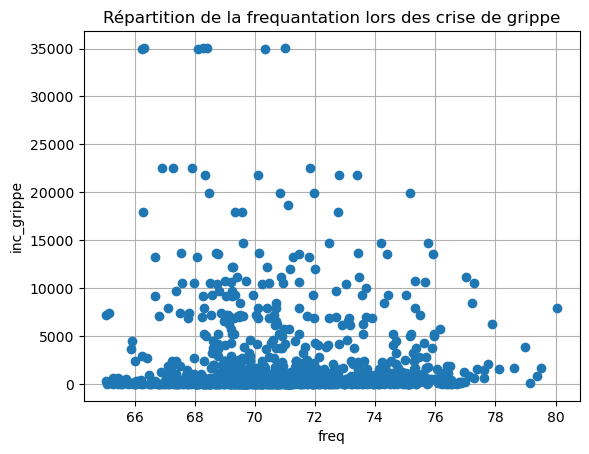

In [408]:
import matplotlib.pyplot as plt

plt.plot(frequentation["freq"],frequentation["inc_grippe"],'o')
plt.xlabel("freq")
plt.ylabel("inc_grippe")
plt.grid()
plt.title('Répartition de la frequantation lors des crise de grippe')
plt.show()

In [409]:
freq_grippe.corr()

,freq,inc_grippe
freq,1.000000,-0.058923
inc_grippe,-0.058923,1.000000


In [410]:
frequentation[['freq','inc_gastro']].corr()

,freq,inc_gastro
freq,1.000000,0.174502
inc_gastro,0.174502,1.000000


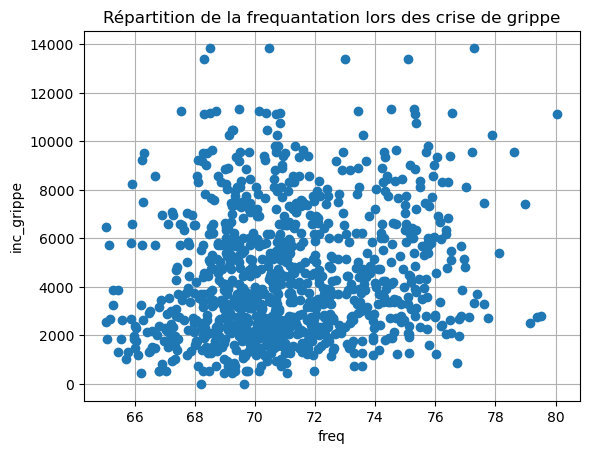

In [411]:
plt.plot(frequentation["freq"],frequentation["inc_gastro"],'o')
plt.xlabel("freq")
plt.ylabel("inc_grippe")
plt.grid()
plt.title('Répartition de la frequantation lors des crise de grippe')
plt.show()

In [412]:
frequentation[['freq','inc_varicelle']].corr()

,freq,inc_varicelle
freq,1.000000,0.037388
inc_varicelle,0.037388,1.000000


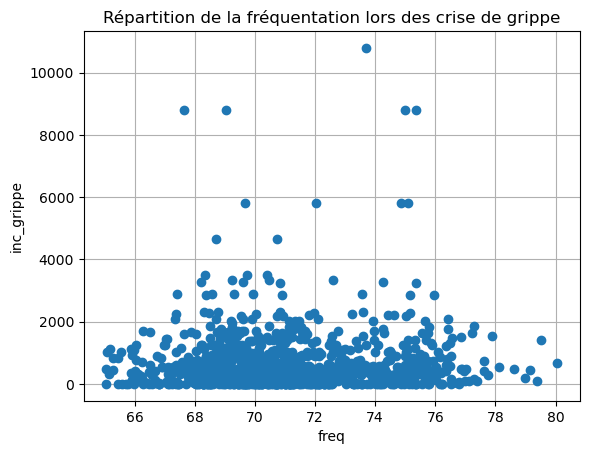

In [413]:
plt.plot(frequentation["freq"],frequentation["inc_varicelle"],'o')
plt.xlabel("freq")
plt.ylabel("inc_grippe")
plt.grid()
plt.title('Répartition de la fréquentation lors des crise de grippe')
plt.show()

#### 10-Calcul des corrélation entre Frequentation et viande,poisson, bio, noel, frites, an_chinois  (une valeurs quantitatives et une valeurs qualitatives)

<Axes: >

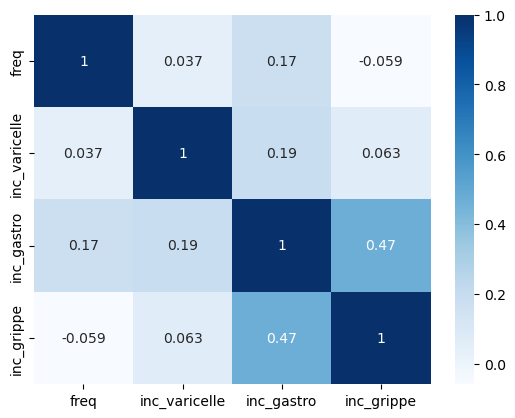

In [414]:
#Verifeier la correlation entre toutes les maladies avec un Heatmap
sns.heatmap(frequentation[['freq','inc_varicelle','inc_gastro','inc_grippe']].corr(), cmap="Blues", annot=True)

### correlation entre maladies et mois ( anova, quantitatif et qualitatif)

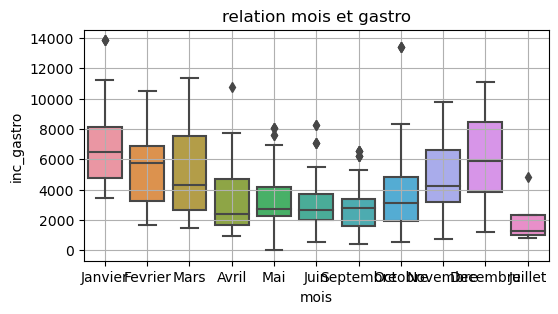

In [415]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='mois',y="inc_gastro",data=frequentation, showfliers=True)
plt.title('relation mois et gastro')
plt.grid()
plt.show()

In [416]:
ml_varicelle= ols('inc_gastro ~ mois', data = frequentation).fit()
freq_varicelle= sm.stats.anova_lm(ml_varicelle)
freq_varicelle

,df,sum_sq,mean_sq,F,PR(>F)
mois,10.0,1.731887e+09,1.731887e+08,33.216206,1.011712e-55
Residual,967.0,5.041921e+09,5.213982e+06,NaN,NaN


In [417]:
ml_varicelle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inc_gastro   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     33.22
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.01e-55
Time:                        16:03:56   Log-Likelihood:                -8945.5
No. Observations:                 978   AIC:                         1.791e+04
Df Residuals:                     967   BIC:                         1.797e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3355.4211    261.926     12.811      0.000    2841.413    3869.429
mois[T.Decembre]   2520.8464    359.490      7.012      0.000    1815.377    3226.316
mois[T.Fevrier]    2099.4956    375.528      5.591      0.000    1362.551    2836.440
mois[T.Janvier]    3336.3437    335.291      9.951      0.000    2678.362    3994.325
mois[T.Juillet]   -1289.9211   1171.367     -1.101      0.271   -3588.635    1008.793
mois[T.Juin]       -269.8667    353.947     -0.762      0.446    -964.460     424.727
mois[T.Mai]          35.5789    352.240      0.101      0.920    -655.664     726.822
mois[T.Mars]       1844.6229    354.826      5.199      0.000    1148.305    2540.941
mois[T.Novembre]   1558.7644    332.646      4.686      0.000     905.973    2211.555
mois[T.Octobre]     378.0221    357.568      1.057      0.291    -323.676    1079.721
mois[T.Septembre]  -586.0574    328.793     -1.782      0.075   -1231.288      59.173
==============================================================================
Omnibus:                       95.048   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.933
Skew:                           0.800   Prob(JB):                     2.02e-27
Kurtosis:                       3.676   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## On trouve une forte correlation entre la gastro et a grippe sur la periode hivernale.on va retenir le parametre mois comme une variable explicative

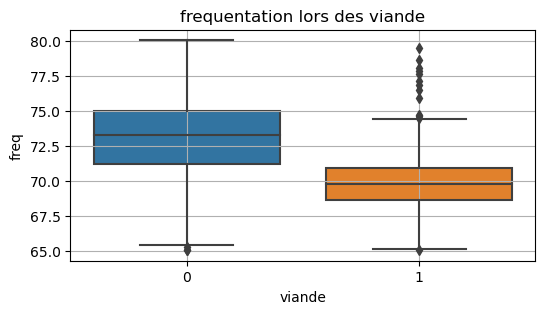

In [418]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='viande',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des viande')
plt.grid()
plt.show()


In [419]:
ml_viande_x= ols('freq ~ viande', data = frequentation).fit()
import statsmodels.api;
freq_viande_x = sm.stats.anova_lm(ml_viande_x)
freq_viande_x

,df,sum_sq,mean_sq,F,PR(>F)
viande,1.0,2237.162009,2237.162009,433.970757,4.999946e-80
Residual,976.0,5031.376160,5.155099,NaN,NaN


In [420]:
ml_viande_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     434.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           5.00e-80
Time:                        16:03:57   Log-Likelihood:                -2188.7
No. Observations:                 978   AIC:                             4381.
Df Residuals:                     976   BIC:                             4391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9359      0.116    630.308      0.000      72.709      73.163
viande        -3.0957      0.149    -20.832      0.000      -3.387      -2.804
==============================================================================
Omnibus:                       30.867   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.730
Skew:                          -0.039   Prob(JB):                     5.93e-17
Kurtosis:                       4.352   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

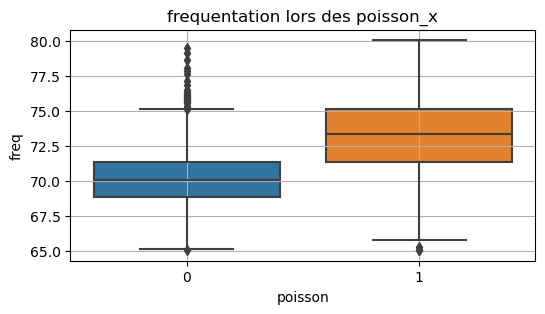

In [421]:
frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='poisson',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des poisson_x')
plt.grid()
plt.show()

In [422]:
ml_poisson_x= ols('freq ~ poisson', data = frequentation).fit()
import statsmodels.api;
freq_poisson_x = sm.stats.anova_lm(ml_poisson_x)
freq_poisson_x

,df,sum_sq,mean_sq,F,PR(>F)
poisson,1.0,1525.414345,1525.414345,259.232509,6.646859e-52
Residual,976.0,5743.123824,5.884348,NaN,NaN


In [423]:
ml_poisson_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           6.65e-52
Time:                        16:03:57   Log-Likelihood:                -2253.4
No. Observations:                 978   AIC:                             4511.
Df Residuals:                     976   BIC:                             4521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2777      0.091    768.150      0.000      70.098      70.457
poisson        2.7779      0.173     16.101      0.000       2.439       3.116
==============================================================================
Omnibus:                       20.873   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.254
Skew:                           0.197   Prob(JB):                     1.63e-07
Kurtosis:                       3.782   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

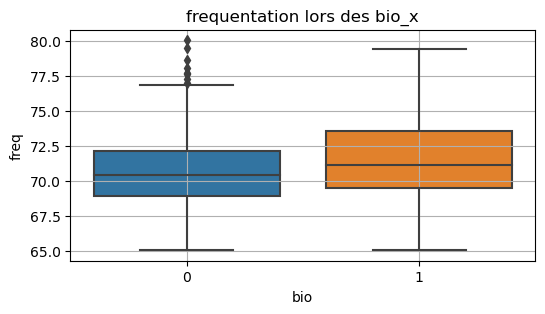

In [424]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='bio',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des bio_x')
plt.grid()
plt.show()

In [425]:
ml_bio_x= ols('freq ~ bio', data = frequentation).fit()
import statsmodels.api;
freq_bio_x= sm.stats.anova_lm(ml_bio_x)
freq_bio_x

,df,sum_sq,mean_sq,F,PR(>F)
bio,1.0,162.752917,162.752917,22.35458,0.000003
Residual,976.0,7105.785253,7.280518,NaN,NaN


In [426]:
ml_bio_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     22.35
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.60e-06
Time:                        16:03:57   Log-Likelihood:                -2357.5
No. Observations:                 978   AIC:                             4719.
Df Residuals:                     976   BIC:                             4729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7064      0.114    620.114      0.000      70.483      70.930
bio            0.8246      0.174      4.728      0.000       0.482       1.167
==============================================================================
Omnibus:                       26.902   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.709
Skew:                           0.416   Prob(JB):                     5.83e-07
Kurtosis:                       2.892   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

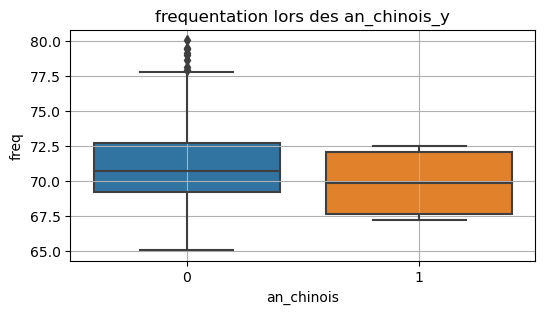

In [427]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='an_chinois',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des an_chinois_y')
plt.grid()
plt.show()

In [428]:
ml_an_chinois_y= ols('freq ~ an_chinois', data = frequentation).fit()
import statsmodels.api;
freq_an_chinois_y= sm.stats.anova_lm(ml_an_chinois_y)
freq_an_chinois_y

,df,sum_sq,mean_sq,F,PR(>F)
an_chinois,1.0,5.758021,5.758021,0.773785,0.379265
Residual,976.0,7262.780148,7.441373,NaN,NaN


In [429]:
ml_an_chinois_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7738
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.379
Time:                        16:03:57   Log-Likelihood:                -2368.2
No. Observations:                 978   AIC:                             4740.
Df Residuals:                     976   BIC:                             4750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0637      0.087    813.019      0.000      70.892      71.235
an_chinois    -1.2023      1.367     -0.880      0.379      -3.884       1.480
==============================================================================
Omnibus:                       28.732   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.693
Skew:                           0.427   Prob(JB):                     2.16e-07
Kurtosis:                       2.847   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

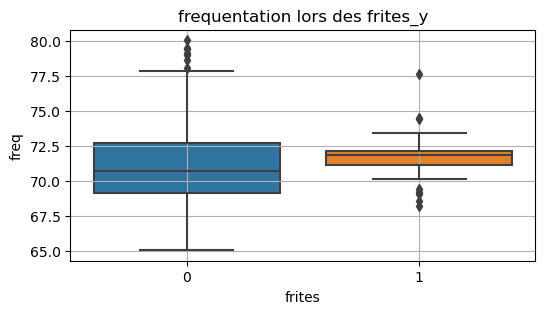

In [430]:
#frequentation
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='frites',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des frites_y')
plt.grid()
plt.show()

In [431]:
ml_frites_y= ols('freq ~ frites', data = frequentation).fit()
import statsmodels.api;
freq_frites_y= sm.stats.anova_lm(ml_frites_y)
freq_frites_y

,df,sum_sq,mean_sq,F,PR(>F)
frites,1.0,15.435719,15.435719,2.077078,0.149847
Residual,976.0,7253.102451,7.431457,NaN,NaN


In [432]:
ml_frites_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.077
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.150
Time:                        16:03:58   Log-Likelihood:                -2367.5
No. Observations:                 978   AIC:                             4739.
Df Residuals:                     976   BIC:                             4749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0339      0.089    799.325      0.000      70.859      71.208
frites         0.6585      0.457      1.441      0.150      -0.238       1.555
==============================================================================
Omnibus:                       30.693   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.040
Skew:                           0.445   Prob(JB):                     6.69e-08
Kurtosis:                       2.866   Cond. No.                         5.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

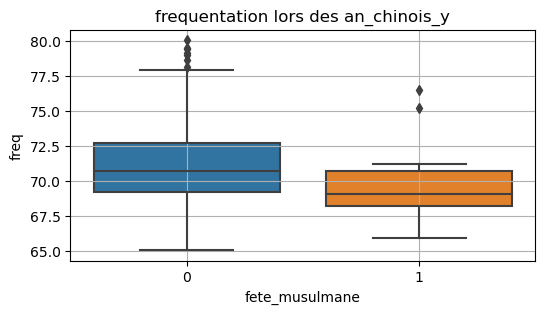

In [433]:
### correlation menu et freq (anova, quali, quali)
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='fete_musulmane',y="freq",data=frequentation, showfliers=True)
plt.title('frequentation lors des an_chinois_y')
plt.grid()
plt.show()

,date,annee_scolaire,jour,semaine,mois,greves,vacances,retour_vacances,veille_vacances,fete_musulmane,...,Juin,Mai,Mars,Novembre,Octobre,Septembre,Jeudi,Lundi,Mardi,Vendredi
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


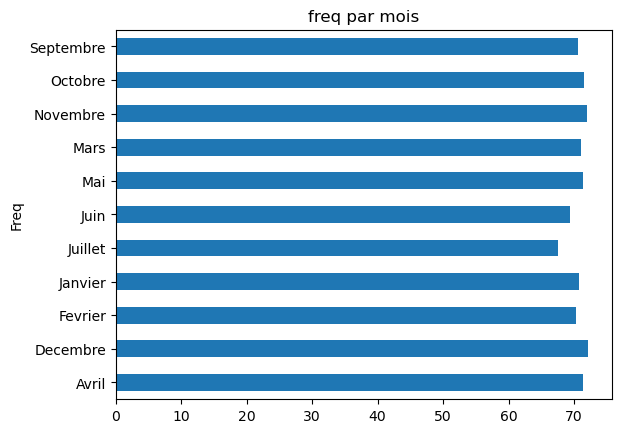

In [434]:
# Supprimer les colonnes qui ne sont pas corellées a la frequentation
colonnes_a_supprimer = ['ferie', 'veille_ferie', 'retour_ferie','fete_chretienne','fete_juive','an_chinois','inc_varicelle','inc_grippe','inc_gastro']
freq_modele = frequentation.drop(colonnes_a_supprimer, axis=1)
# Split des mois 
freq_split_mois = pd.get_dummies(freq_modele.mois)
freq_modele = freq_modele.join(freq_split_mois)
# Split des jours
freq_split_jours= pd.get_dummies(freq_modele.jour)
freq_modele = freq_modele.join(freq_split_jours)
#supprimer les jours de greves
freq_modele = freq_modele.drop(freq_modele[freq_modele['greves'] == 1].index)
# ajuster les frequences sur les années
freq_modele = freq_modele.replace(17652, 17373)
freq_modele = freq_modele.replace(18497, 18633)

#verifier le frequence par mois
freq_modele.groupby("mois").freq.mean().plot(kind = "barh", title="freq par mois",ylabel="Freq")
freq_modele.head(2)

In [537]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels



modele = smf.ols('reel ~-1+effectif+Lundi+Mardi+Jeudi+Vendredi+Fevrier+Juillet+Juin+Septembre+Novembre+Decembre+veille_vacances+viande+poisson', data=freq_modele).fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     666.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:29:39   Log-Likelihood:                -6665.6
No. Observations:                 933   AIC:                         1.336e+04
Df Residuals:                     919   BIC:                         1.343e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Lundi[False]      -2160.2197    153.40

##  Création des modèles 

### Regression linéaire

In [436]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [437]:
train= freq_modele[freq_modele['annee_scolaire'] != '2018-2019']
test= freq_modele[freq_modele['annee_scolaire'] == '2018-2019']

X= freq_modele[['effectif','Lundi','Mardi','Jeudi','Vendredi','Fevrier','Juillet','Juin','Septembre','Decembre','vacances','veille_vacances','viande','poisson','bio']]
Y = freq_modele[['reel']]

In [438]:
X.loc[[1,24]]

,effectif,Lundi,Mardi,Jeudi,Vendredi,Fevrier,Juillet,Juin,Septembre,Decembre,vacances,veille_vacances,viande,poisson,bio
1,17373,False,True,False,False,False,False,False,False,False,0,0,1,0,0
24,17373,True,False,False,False,True,False,False,False,False,0,0,1,0,0


In [439]:
X_train = np.array(X.loc[train.index])
X_test = np.array(X.loc[test.index])
y_train = np.array(Y.loc[train.index])
y_test = np.array(Y.loc[test.index])

In [440]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((839, 15), (94, 15), (839, 1), (94, 1))

### Regression Lineaire

In [441]:
#Je fit mes valeurs sur une equation , je calcule une fonction de Y en fonction de X 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [442]:
# je calcule une fonction de Y en fonction de X sur les valeurs tests
y_pred_reg = regr.predict(X_test)

test["y_pred_reg"]= y_pred_reg.round()
y_pred_reg.shape

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\641276888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["y_pred_reg"]= y_pred_reg.round()


(94, 1)

In [443]:
regr.coef_

array([[ 9.03749808e-01, -3.72541366e+02,  5.49874000e+01,
         5.06555546e+01,  2.66898411e+02, -1.58508530e+02,
        -1.46409035e+03, -4.88827197e+02, -1.95994138e+02,
         9.19920487e+01,  1.23269669e+02, -1.34257619e+02,
        -2.60727898e+02,  1.25812278e+02, -9.28850010e+00]])

In [444]:
# je calcule une fonction de Y en fonction de X sur les valeurs trains
pred_train_y = regr.predict(X_train)
pred_train_y.shape

(839, 1)

In [445]:
np.linspace(2,4)

array([2.        , 2.04081633, 2.08163265, 2.12244898, 2.16326531,
       2.20408163, 2.24489796, 2.28571429, 2.32653061, 2.36734694,
       2.40816327, 2.44897959, 2.48979592, 2.53061224, 2.57142857,
       2.6122449 , 2.65306122, 2.69387755, 2.73469388, 2.7755102 ,
       2.81632653, 2.85714286, 2.89795918, 2.93877551, 2.97959184,
       3.02040816, 3.06122449, 3.10204082, 3.14285714, 3.18367347,
       3.2244898 , 3.26530612, 3.30612245, 3.34693878, 3.3877551 ,
       3.42857143, 3.46938776, 3.51020408, 3.55102041, 3.59183673,
       3.63265306, 3.67346939, 3.71428571, 3.75510204, 3.79591837,
       3.83673469, 3.87755102, 3.91836735, 3.95918367, 4.        ])

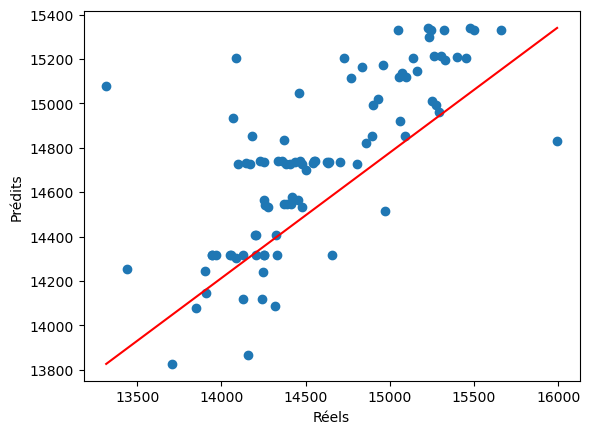

In [446]:
plt.scatter(y_test, y_pred_reg)
plt.plot(np.linspace(y_test.min(), y_test.max()), np.linspace(y_pred_reg.min(), y_pred_reg.max()), c='r')
plt.xlabel('Réels')
plt.ylabel('Prédits')
plt.show()
#plt.plot(np.arange(len(y_test)), np.arange(len(y_test)))

In [447]:
regr.score(X_test, y_test)

0.4540565984522451

In [448]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, pred_train_y)

0.9016617698404147

In [449]:
r2_score(y_test, y_pred_reg)


0.4540565984522451

### sauvegarger les scores 

In [450]:
compa = pd.DataFrame ()
compa.loc['score',"reg_lin"]  = round(r2_score(y_test, y_pred_reg),3) #sauvegardons le score
compa

,reg_lin
score,0.454


### Modèle Ridge

In [533]:
#recherche du bon alpha pour le modele Ridge, On va utiliser le Gridsearchcv pour identifier le bon modele 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# Créer un dictionnaire avec les valeurs d'alpha à tester
param_grid = {'alpha': [0,0.1, 1.0, 10.0,3, 5, 7, 9, 11, 13, 15]}

# Créer l'estimateur Ridge
ridge = Ridge()

# Utiliser GridSearchCV pour trouver la meilleure valeur d'alpha
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenir la meilleure valeur d'alpha
best_alpha = grid_search.best_params_['alpha']
print("best_alpha:", best_alpha)


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.20371e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


best_alpha: 13


In [452]:
from sklearn.linear_model import Ridge

# Créer et entraîner le modèle Ridge avec le alpha trouvé précédement
model = Ridge(alpha=13)  # Paramètre d'hyperparamètre alpha pour la régularisation
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_ridge = model.predict(X_test)
test["y_pred_ridge"]=y_pred_ridge.round()
# Évaluer les performances du modèle

r2 = r2_score(y_test, y_pred_ridge)

print("Coefficient of Determination (R²):", r2)


Coefficient of Determination (R²): 0.42444112650132804


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\1261453955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["y_pred_ridge"]=y_pred_ridge.round()


In [453]:
compa.loc['score',"ridge"]  = round(r2,3) #sauvegardons le score
compa

,reg_lin,ridge
score,0.454,0.424


### Modèle lasso 

In [454]:
from sklearn.linear_model import Lasso

# Créer et entraîner le modèle Lasso
model_lasso = Lasso(alpha=13)  # Paramètre d'hyperparamètre alpha pour la régularisation
model_lasso.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lasso = model_lasso.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error (MSE): 169661.27078577786
Coefficient of Determination (R²): 0.3627936901926585


### DecisionTreeRegressor

In [455]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Création du modèle Arbre de décision pour la régression
model = DecisionTreeRegressor()

# Définition de la grille des hyperparamètres à explorer
param_grid = {
    'max_depth': [None] + list(np.arange(5, 21, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6)
}

# Choisir un score à optimiser, ici la mse 
score = 'r2'

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring= score)

# Exécution de la recherche sur la grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres et du score correspondant
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)


# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(grid_search.best_params_)



Meilleurs hyperparamètres : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7}
Meilleur score : 0.110427532192506
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7}


In [456]:
compa.loc['score',"DT"]  = round(grid_search.best_score_,3) #sauvegardons le score
compa

,reg_lin,ridge,DT
score,0.454,0.424,0.11


### KNN

In [457]:
from sklearn.neighbors import KNeighborsRegressor

In [458]:
# Créer le modèle de régression des k plus proches voisins
model = KNeighborsRegressor()

# Définir la grille des hyperparamètres à tester
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}  # Par exemple, tester différentes valeurs de k

# Effectuer la recherche par grille avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred_knn = best_model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("Best n_neighbors:", best_n_neighbors)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)

Best n_neighbors: 15
Mean Squared Error (MSE): 465102.43768321484
Coefficient of Determination (R²): -0.746811199903872


In [459]:
compa.loc['score',"Knn"]  = round(r2,3) #sauvegardons le score
compa

,reg_lin,ridge,DT,Knn
score,0.454,0.424,0.11,-0.747


### GradientBoostingRegressor

In [460]:
from sklearn.ensemble import GradientBoostingRegressor

In [461]:
# Créer et entraîner le modèle Gradient Boosting Regressor avec les paramètres spécifiés
model = GradientBoostingRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, min_samples_split=3)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_GB = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_GB)
r2 = r2_score(y_test, y_pred_GB)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 178438.40564658647
Coefficient of Determination (R²): 0.32982891461698205


In [462]:
compa.loc['score',"GB"]  = round(r2,3) #sauvegardons le score
compa

,reg_lin,ridge,DT,Knn,GB
score,0.454,0.424,0.11,-0.747,0.33


### le modèle ElasticNet

In [463]:
from sklearn.linear_model import ElasticNet

In [464]:
# Créer le modèle ElasticNet
model = ElasticNet()

# Définir la grille des hyperparamètres à tester
param_grid = {'alpha': [0.1, 1.0, 10.0,0,3, 5, 7, 9, 11, 13, 15]}

# Effectuer la recherche par grille avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred_Elast = best_model.predict(X_test)
test["y_pred_Elast"]=y_pred_Elast.round()

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred_Elast)
r2 = r2_score(y_test, y_pred_Elast)

print("Best Alpha:", best_alpha)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)


Best Alpha: 0
Mean Squared Error (MSE): 145361.7923396086
Coefficient of Determination (R²): 0.45405659845224045


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+07, tolerance: 4.771e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

In [465]:
compa.loc['score',"ELAS"]  = round(r2,3) #sauvegardons le score
compa

,reg_lin,ridge,DT,Knn,GB,ELAS
score,0.454,0.424,0.11,-0.747,0.33,0.454


## De part les scoring, nous allons retenir les modeles de regression linéaire , de ridge et Elastique
nous allons pouvoir analyser le gaspillage avec ces modeles 

### Pourcentage de gaspillage actuel sur notre jeux de donnees

In [529]:
Actual= ((DF_analyse ["prevision"] - DF_analyse ["reel"]).sum())/DF_analyse ["reel"].sum()
Actual

0.05599211923308463

### REGRESSION LINEAIRE

In [ ]:
### verifions les predictions des modèles Reg_lin, ridge et elastic 
DF_analyse=test[[ "date","effectif","prevision","reel","y_pred_reg","y_pred_ridge","y_pred_Elast"]]
DF_analyse["prev-reel"] = DF_analyse["prevision"] - DF_analyse["reel"]
DF_analyse["reg-reel"] = DF_analyse["y_pred_reg"] - DF_analyse["reel"]
DF_analyse["ridge-reel"] = DF_analyse["y_pred_ridge"] - DF_analyse["reel"]
DF_analyse["Elast-reel"] = DF_analyse["y_pred_Elast"] - DF_analyse["reel"]


### pourcentage de gaspillage avec la regression linéaire et adjustement des prédictions de 3.5%

In [531]:
DF_analyse ["y_pred_reg_marge"] = DF_analyse ["y_pred_reg"] *(1+0.035)
Modele=((DF_analyse ["y_pred_reg_marge"] - DF_analyse ["reel"]).sum())/DF_analyse ["reel"].sum()
Modele

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\684839922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_analyse ["y_pred_reg_marge"] = DF_analyse ["y_pred_reg"] *(1+0.035)


0.04607333126584811

In [528]:
DF_analyse[DF_analyse ["y_pred_reg_marge"] >  DF_analyse ["reel"]]["reg_marge-reel"].sum()/DF_analyse ["reel"].sum()


0.04654322199317723

In [532]:
#gain sur le gaspillage en utilisant ce modele 

Gain = Actual- Modele
Gain

0.009918787967236518

### nombre de jour de sous-alimentation avec ce modele

In [516]:
DF_analyse ["reg_marge-reel"] =DF_analyse ["y_pred_reg_marge"] - DF_analyse ["reel"]
len(DF_analyse[DF_analyse ["y_pred_reg_marge"] <  DF_analyse ["reel"]] ["reg_marge-reel"])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\1440727133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_analyse ["reg_marge-reel"] =DF_analyse ["y_pred_reg_marge"] - DF_analyse ["reel"]


1

In [517]:
DF_analyse.describe()

,effectif,prevision,reel,y_pred_reg,y_pred_ridge,y_pred_Elast,prev-reel,reg-reel,ridge-reel,Elast-reel,y_pred_reg_marge,reg_marge-reel
count,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,20344.0,15395.297872,14578.989362,14734.968085,14742.021277,14734.968085,816.308511,155.978723,163.031915,155.978723,15250.691968,671.702606
std,0.0,475.202613,518.768714,381.376016,346.015289,381.376016,418.619750,349.711832,357.812363,349.711832,394.724177,349.897721
min,20344.0,14336.000000,13316.000000,13826.000000,13922.000000,13826.000000,-163.000000,-1163.000000,-1192.000000,-1163.000000,14309.910000,-643.950000
25%,20344.0,15044.750000,14209.750000,14406.000000,14445.000000,14406.000000,523.250000,-13.500000,-9.500000,-13.500000,14910.210000,488.342500
50%,20344.0,15318.000000,14458.000000,14738.000000,14715.000000,14738.000000,813.000000,124.500000,161.000000,124.500000,15253.830000,644.505000
75%,20344.0,15780.000000,15028.000000,15072.000000,15091.000000,15072.000000,1060.750000,310.000000,319.250000,310.000000,15599.520000,821.503750
max,20344.0,16962.000000,15993.000000,15340.000000,15276.000000,15340.000000,2653.000000,1764.000000,1776.000000,1764.000000,15876.900000,2291.800000


In [485]:

# Utilisez la fonction 'loc' pour filtrer les enregistrements en fonction de la valeur de la colonne
resultats = DF_analyse.loc[DF_analyse['prev-reel'] == 2653]
resultats

,date,effectif,prevision,reel,y_pred_reg,y_pred_ridge,y_pred_Elast,prev-reel,reg-reel,ridge-reel,Elast-reel,y_pred_reg_marge,reg_marge-reel
1012,2019-04-05,20344,15969,13316,15080.0,15092.0,15080.0,2653,1764.0,1776.0,1764.0,15622.88,2306.88


In [487]:
mins = DF_analyse.loc[DF_analyse['prev-reel'] ==-163]
mins

,date,effectif,prevision,reel,y_pred_reg,y_pred_ridge,y_pred_Elast,prev-reel,reg-reel,ridge-reel,Elast-reel,y_pred_reg_marge,reg_marge-reel
935,2018-09-27,20344,14897,15060,14919.0,14933.0,14919.0,-163,-141.0,-127.0,-141.0,15456.084,396.084


### Ridge

In [518]:
DF_analyse ["y_pred_ridge_marge"] = DF_analyse ["y_pred_ridge"] *(1+0.035)
((DF_analyse ["y_pred_ridge_marge"] - DF_analyse ["reel"]).sum())/DF_analyse ["reel"].sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\3018806190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_analyse ["y_pred_ridge_marge"] = DF_analyse ["y_pred_ridge"] *(1+0.035)


0.04657405549373361

In [519]:
#nombre de jour de sous-alimentation avec ce modele
DF_analyse ["ridge_marge-reel"] =DF_analyse ["y_pred_ridge_marge"] - DF_analyse ["reel"]
len(DF_analyse[DF_analyse ["y_pred_ridge_marge"] <  DF_analyse ["reel"]] ["ridge_marge-reel"])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\3299909153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_analyse ["ridge_marge-reel"] =DF_analyse ["y_pred_ridge_marge"] - DF_analyse ["reel"]


1

In [521]:
DF_analyse[DF_analyse ["y_pred_ridge_marge"] >  DF_analyse ["reel"]]["ridge_marge-reel"].sum()/DF_analyse ["reel"].sum()

0.04706584818578171

### ELASTIQUE

In [525]:
DF_analyse ["y_pred_Elast_marge"] = DF_analyse ["y_pred_Elast"] *(1+0.035)
((DF_analyse ["y_pred_Elast_marge"] - DF_analyse ["reel"]).sum())/DF_analyse ["reel"].sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\1074571364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_analyse ["y_pred_Elast_marge"] = DF_analyse ["y_pred_Elast"] *(1+0.035)


0.04607333126584811

In [526]:
#nombre de jour de sous-alimentation avec ce modele
DF_analyse ["Elast_marge-reel"] =DF_analyse ["y_pred_Elast_marge"] - DF_analyse ["reel"]
len(DF_analyse[DF_analyse ["y_pred_Elast_marge"] <  DF_analyse ["reel"]] ["Elast_marge-reel"])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22504\595393791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_analyse ["Elast_marge-reel"] =DF_analyse ["y_pred_Elast_marge"] - DF_analyse ["reel"]


1